```
Hex 	RGB
#05085a 	(5,8,90)
#d2d2d2 	(210,210,210)
#6262bc 	(98,98,188)
#b4e9f8 	(180,233,248)
#262525 	(38,37,37)
```

# <span style='color:#262525'> Comparativo entre texto escrito e Biblia </span>

## <span style='color:#6262bc'> Importação do arquivo </span>

In [1]:
%store -r __imp

In [2]:
__imp

The libraries have been loaded!


In [3]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from string import punctuation
from wordcloud import WordCloud
import networkx as nx
import itertools
import numpy as np
from PIL import Image
from os import path
import random
import re
from nltk.tokenize import sent_tokenize
from cogroo_interface import Cogroo


In [4]:
stopwords = set(list(nltk.corpus.stopwords.words('portuguese') ) + ['assim','é','antes','porque','pois','vós'])
tokenizer = TreebankWordTokenizer()
re_letra = re.compile('\W')

In [5]:
texto = ''
with open('C:/Work/csv/cristianismo_puro_simples_cs_lewis.txt') as f:
    texto = f.read()
cogroo = Cogroo.Instance()
doc_b = cogroo.analyze(texto)


In [22]:
dict_pt = cogroo.pos_tags
pares_verbos = []
pares_subs = []
todas_palavras_add = []
sujeitos = []
for s in doc_b.sentences:
    subs, advs, vs, adjs = [],[],[],[]
    for t in s.tokens:
        if t.lexeme not in stopwords and t.pos in dict_pt:
            if 'verbo' in dict_pt[t.pos]:
                vs.append(t.lemma)
            elif 'substantivo' in dict_pt[t.pos] or t.pos == 'prop':
                subs.append(t.lemma)
            elif 'advérbio' in dict_pt[t.pos]:
                advs.append(t.lemma)
            elif 'adjetivo' in dict_pt[t.pos]:
                adjs.append(t.lemma)
        if 'SUBJ' in t.synchunk:
            sujeitos.append(t.lemma)

    todas_palavras_add.extend(vs+subs+advs+adjs)
    pares_verbos.extend( list(itertools.product(vs,subs)))
    pares_subs.extend(list(itertools.product(subs,vs))+ list(itertools.product(sorted(subs),sorted(subs))))

pares_subs =  [p for p in pares_subs if p[0] != p[1]]
    
palavras_add = list(set(todas_palavras_add))


In [25]:
sujeitos = [s for s in sujeitos if s not in punctuation and s.lower() not in stopwords]
pd.DataFrame(sujeitos,columns=['suj']).reset_index().groupby('suj').count().sort_values('index',ascending=False)
            

,index
suj,
pessoa,177
Deus,168
todo,163
homem,158
outro,120
coisa,114
cristão,108
Cristo,68
cristianismo,62


## <span style='color:#6262bc'> Visualização das palavras </span>

### <span style='color:#05085a'>Exploracao inicial</span>

In [26]:
print('%i palavras diferentes.' %len(palavras_add))
print('%i palavras.' %len(todas_palavras_add))
print('Taxa de repetição dos lemas %.2f' %(len(todas_palavras_add)/len(palavras_add)))
df_p = pd.DataFrame(todas_palavras_add,columns=['palavra'])
c = df_p.reset_index().groupby('palavra').count().sort_values('index')
c.columns = ['contador']
c['pc'] = c.contador*100/sum(c.contador)

c.sort_values('contador',ascending=False).head(50)


4329 palavras diferentes.
29421 palavras.
Taxa de repetição dos lemas 6.80


,contador,pc
palavra,,
poder,577,1.961184
ser,561,1.906801
fazer,374,1.271201
Deus,350,1.189626
pessoa,335,1.138642
dizer,334,1.135244
homem,306,1.040073
coisa,273,0.927909
cristão,236,0.802148


### <span style='color:#05085a'> Wordcloud </span>

(-0.5, 1279.5, 928.5, -0.5)

<Figure size 432x288 with 0 Axes>

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


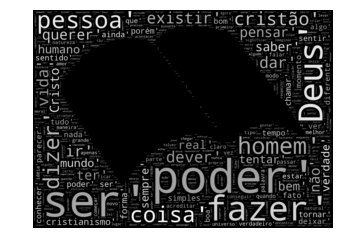

<Figure size 432x288 with 0 Axes>

In [12]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

mask = np.array(Image.open(path.join('C:\\Work\\', "1280px-Open_bible_01_01.png")))

wc = WordCloud(max_words=1000, mask=mask, margin=10,
               random_state=1).generate(str(todas_palavras_add))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
#wc.to_file("wordcloud_.png")
plt.axis("off")
plt.figure()


### <span style='color:#05085a'> Grafo das palavras</span>

* Palavras no mesmo versículo.<br/> 
* 10 palavras mais relacionadas até a profundidade 2.<br/> 
* Verbos mais próximos


In [ ]:
gvb = nx.Graph()
gvb.add_nodes_from(palavras_add)
df_arestas = pd.DataFrame(pares_verbos,columns=['verbo','palavra']).reset_index().groupby(['verbo','palavra']).count()
df_arestas.columns = ['qtd']
df_arestas.sort_values('qtd',ascending=False).head(20)
gvb.add_weighted_edges_from(df_arestas.reset_index().itertuples(index=False,name=None))


In [29]:
def desenha_grafo(g,palavra_psqd,vai_salvar=False,nm_arq=''):
    cores_arestas =  ['green' if  palavra_psqd in e   else 'blue' for e in list(g.edges)]
    cores_nos =  ['#d2d2d2' if n == palavra_psqd else '#6262bc' for n in list(g.nodes)]
    tam_nos =  [2400 if n == palavra_psqd else 1200 for n in list(g.nodes)]
    pesos = np.array( [e[2]['weight'] for e in list(gsb.edges(data=True))])
    pesos = pesos - min(pesos) 
    pesos = (np.divide(pesos, max(pesos) - min(pesos))) * 20
    plt.figure(figsize=(20,20))
    #nx.draw(g,font_family='arial', node_color=cores_nos, with_labels=True,width=pesos)
    nx.draw_circular(g,edge_color=cores_arestas,font_size=24, node_color=cores_nos,node_size=tam_nos, with_labels=True,width=pesos)
    if vai_salvar:
        plt.draw()
        plt.savefig(nm_arq,dpi=1200)

c:\users\italo dell\appdata\local\programs\python\python35\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


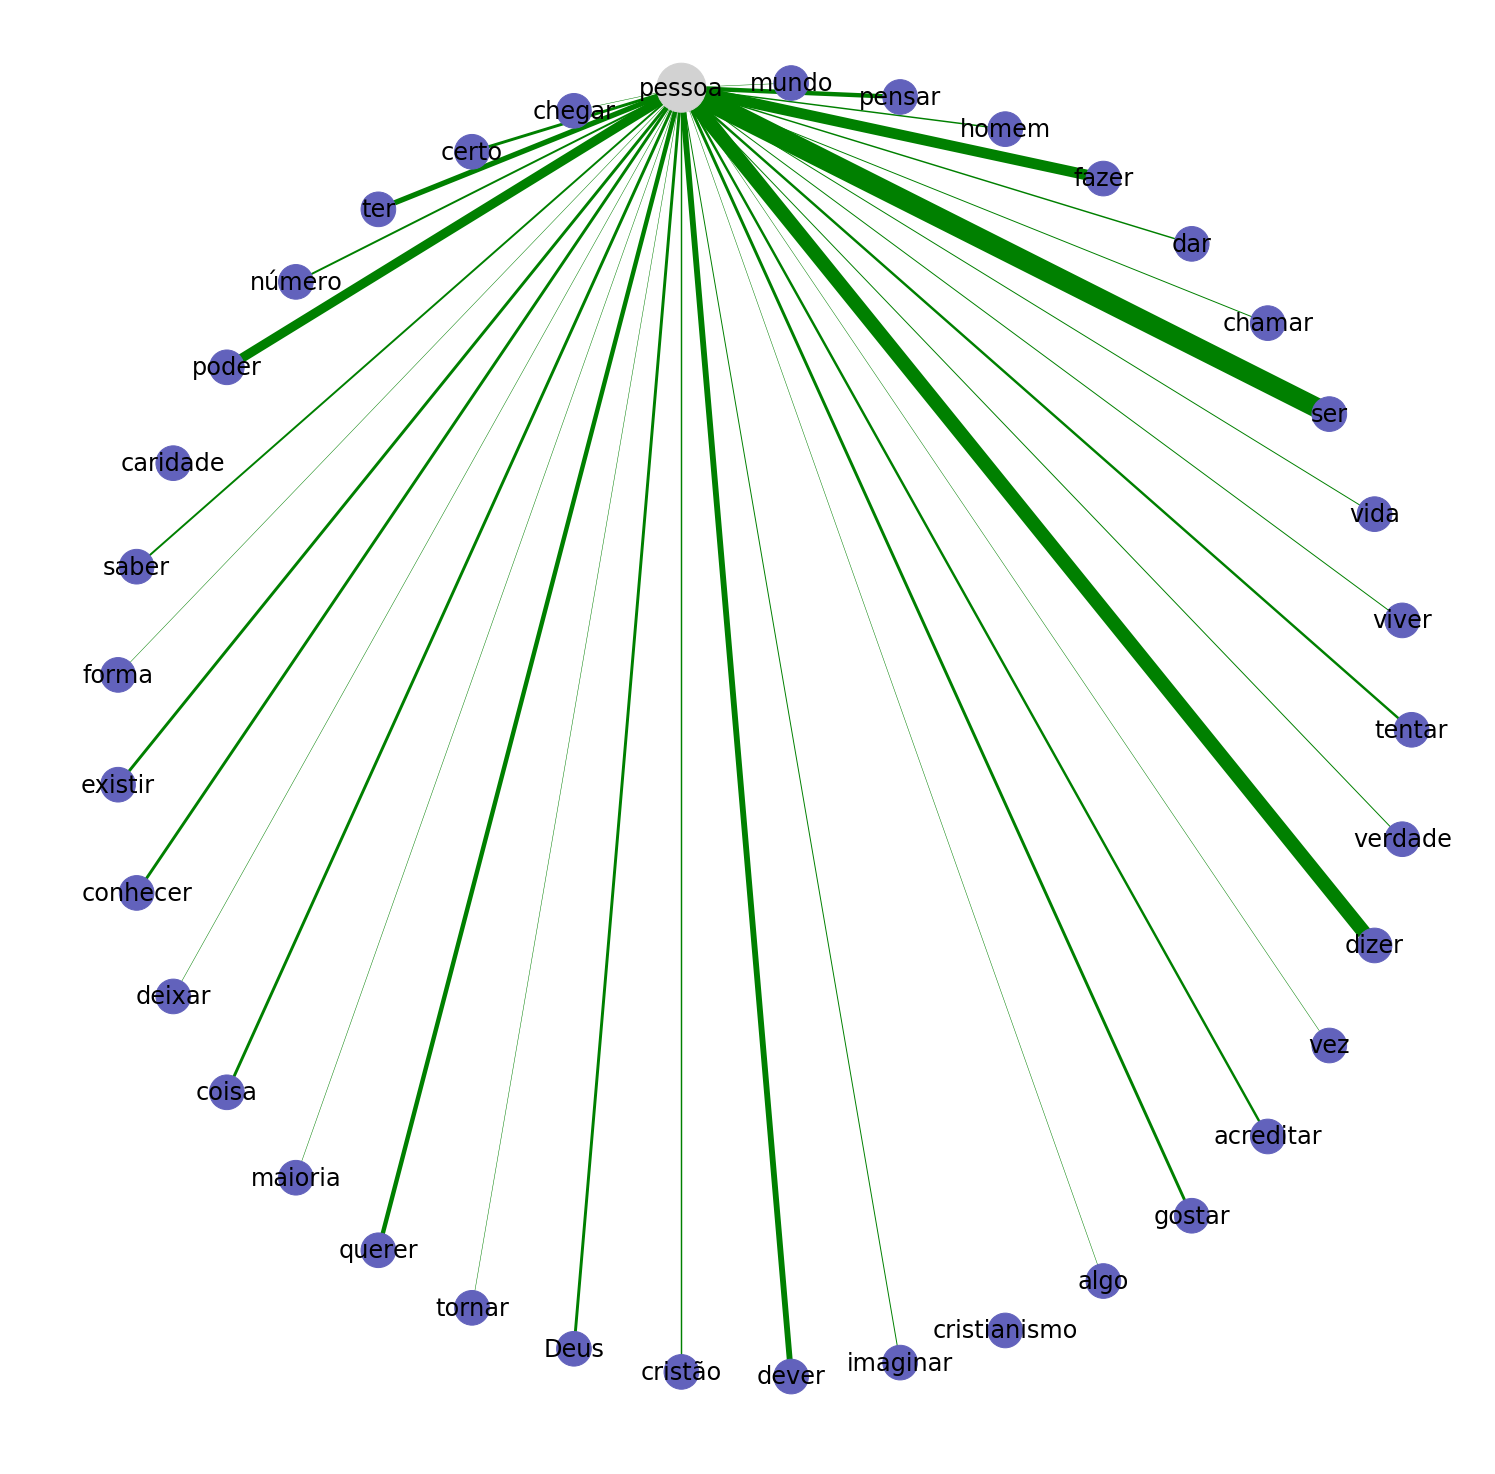

In [31]:
PALAVRA_PESQUISADA = 'pessoa'
QTD_NOS = 50
df_arestas = pd.DataFrame(pares_subs,columns=['substantivo','palavra']).reset_index().groupby(['substantivo','palavra']).count().reset_index()
df_arestas.columns = ['p1','p2','qtd']
df_arestas = df_arestas[(df_arestas.p1 == PALAVRA_PESQUISADA) | (df_arestas.p2 == PALAVRA_PESQUISADA)]
df_grafo = df_arestas.sort_values('qtd',ascending=False).head(QTD_NOS)


gsb = nx.Graph()
gsb.add_nodes_from(set(df_grafo.p2.tolist() + df_grafo.p2.tolist()) )
gsb.add_weighted_edges_from(df_grafo.itertuples(index=False,name=None))
desenha_grafo(gsb,PALAVRA_PESQUISADA)

## Comparação com as escrituras